# Linear Regression

Linear regression is a foundational algorithm in machine learning, offering a simple yet powerful approach for predicting a quantitative response. It's particularly useful in scenarios where the relationship between the independent variable(s) (features) and the dependent variable (target) is linear. The core idea is to find a linear function that best fits the data points, minimizing the difference between the predicted values and actual values.

## Comprehensive Key Concepts in Linear Regression

### 1. Model Representation
Linear regression models the relationship between a dependent variable and one or more independent variables using a linear approach. The simplest form of linear regression, single-variable (or simple) linear regression, can be represented by the equation:
$$ y = w_1x + w_0 $$
where $y$ is the dependent variable, $x$ is the independent variable, $w_1$ is the slope (coefficient) of the model, and $w_0$ is the y-intercept (bias). This equation can be extended to multiple linear regression, which includes multiple independent variables:
$$ y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $$
Here, each $x_i$ represents a different independent variable, and each $w_i$ represents the coefficient for that variable.

### 2. Cost Functions

The cost function quantifies the error between the predicted values by the model and the actual values from the dataset. It is a key component in evaluating the performance of the model. The most commonly used cost functions in linear regression are:

- **Mean Squared Error (MSE):**
$$J(w_0, w_1, ..., w_n) = \frac{1}{2m} \sum_{i=1}^{m} (f_w(x^{(i)}) - y^{(i)})^2$$
where $m$ is the number of training examples, $f_w(x^{(i)})$ is the prediction of the model for the $i^{th}$ example, and $y^{(i)}$ is the actual value.

- **Mean Absolute Error (MAE):**
$$J(w_0, w_1, ..., w_n) = \frac{1}{m} \sum_{i=1}^{m} |f_w(x^{(i)}) - y^{(i)}|$$

These cost functions are optimized during training to find the best values for the model parameters.
.

### 3. Gradient Descent

Gradient Descent is an optimization algorithm used to minimize the cost function by iteratively updating the model's parameters. The general update equations for the parameters in a linear regression model are:
$$ w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w_0, w_1, ..., w_n) $$
for $j = 0, 1, ..., n$, where $\alpha$ is the learning rate, a hyperparameter that controls the step size during the iteration process.

For the simple linear regression case, the update rules for \(w_0\) (bias) and \(w_1\) (weight) become:
- Update rule for $w_0$ (bias):
$$ w_0 := w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_w(x^{(i)}) - y^{(i)}) $$
- Update rule for $w_1$ (weight):
$$ w_1 := w_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} ((f_w(x^{(i)}) - y^{(i)}) \cdot x^{(i)}) $$

These equations are applied iteratively to adjust the parameters and minimize the cost function.


### 4. Model Evaluation Metrics
After training a linear regression model, it's important to evaluate its performance using suitable metrics. Common evaluation metrics include:
- **R-squared (Coefficient of Determination):** Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Root Mean Squared Error (RMSE):** The square root of the MSE, providing an interpretable measure of the average error magnitude.

### 5. Regularization
Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. The two most common types of regularization in linear regression are:
- **Ridge Regression (L2 regularization):** Adds a penalty equal to the square of the magnitude of coefficients.
- **Lasso Regression (L1 regularization):** Adds a penalty equal to the absolute value of the magnitude of coefficients.

### 6. Assumptions of Linear Regression
Linear regression is based on several key assumptions, including linearity, independence, homoscedasticity, and normal distribution of residuals. Ensuring these assumptions are met is crucial for the model to provide accurate and reliable predictions.

This comprehensive overview provides a deeper understanding of the fundamental concepts in linear regression, setting a solid foundation for exploring more advanced topics and techniques in machine learning.

## Distinction between Cost Functions and Model Evaluation Metrics

The distinction between cost functions and model evaluation metrics in the context of machine learning, specifically in linear regression, can indeed be confusing because they both involve calculations that measure errors. However, their purposes and how they are used in the model development process differ significantly. Let's clarify these differences:

### Cost Functions

- **Purpose:** The primary role of a cost function, also known as a loss function, is to measure the error between the predicted values by the model and the actual values in the training dataset. It quantifies how well the model is performing during the training process.
- **Usage:** Cost functions are used during the training of the model to guide the optimization of the model parameters. Through an iterative process, such as gradient descent, the model's parameters are adjusted to minimize the cost function, aiming to reduce the overall error of the model on the training data.
- **Examples:** In linear regression, common cost functions include the Mean Squared Error (MSE) and the Mean Absolute Error (MAE). These functions are chosen because they are differentiable, which facilitates the optimization process using gradient descent or similar algorithms.

### Model Evaluation Metrics

- **Purpose:** Model evaluation metrics are used to assess the performance of a model after it has been trained. They provide a way to quantify the model's accuracy, effectiveness, and generalizability to new, unseen data. Evaluation metrics are crucial for comparing different models or model configurations to decide which performs best for a specific task.
- **Usage:** Unlike cost functions, evaluation metrics are not directly used during the model's training process. Instead, they are applied after a model has been trained, using both the training set and validation/test sets to understand the model's performance across different data samples. This helps in diagnosing issues like overfitting or underfitting.
- **Examples:** Common model evaluation metrics in linear regression include R-squared (Coefficient of Determination), Adjusted R-squared, and Root Mean Squared Error (RMSE). These metrics provide insights into how well the model captures the variance of the data, the size of errors, and other aspects of model performance that are important for interpreting the model's effectiveness in practical applications.

### Key Differences

- **Application Phase:** Cost functions are central to the training and optimization phase, while evaluation metrics are used post-training to assess and compare model performance.
- **Objective:** Cost functions aim to minimize error during training, directly influencing the model's learning process. Evaluation metrics aim to provide a comprehensive measure of model performance, often focusing on aspects important for the model's practical use.
- **Optimization:** Cost functions need to be differentiable to facilitate optimization


## Dataset for Demonstration

For the purpose of illustration, we'll use a simple dataset: housing prices, where the goal is to predict the price of a house based on its size (square feet). This dataset typically includes:

- Feature (X): Size of the house (in square feet)
- Target (y): Price of the house


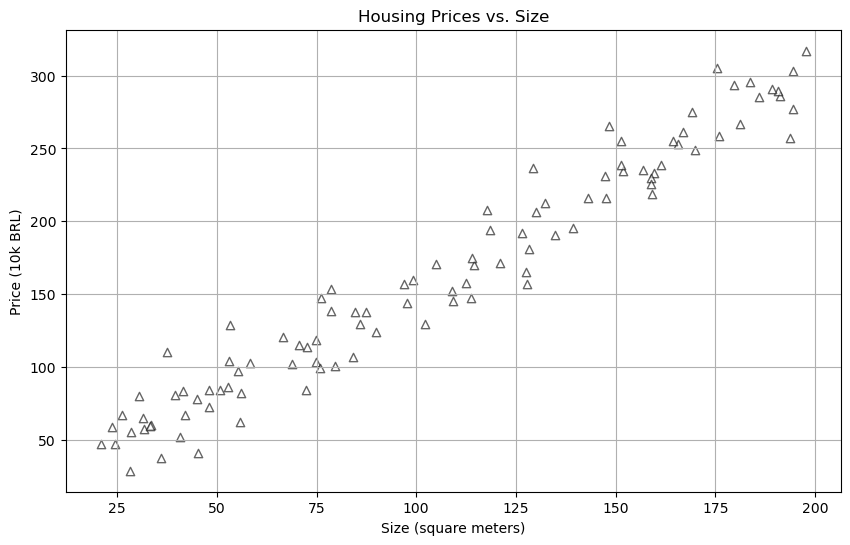

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_0 = 50000  # base price (bias)
theta_1 = 15000  # price per square meter
num_samples = 100

# Generate 100 random samples for house sizes within the 20m2 to 200m2 range
np.random.seed(42)  # For reproducibility
X = np.random.uniform(20, 200, num_samples)

# Generate house prices based on the linear relationship plus some noise
noise = np.random.randn(num_samples) * 200_000  # Noise with standard deviation of 200,000 BRL
y = theta_0 + theta_1 * X + noise
y = y / 1e4

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='white', alpha=0.6, marker = "^", edgecolors='black')
plt.title('Housing Prices vs. Size')
plt.xlabel('Size (square meters)')
plt.ylabel('Price (10k BRL)')
# plt.legend()
plt.grid(True)
plt.show()

This code generates and plots a simple linear relationship between the size of the house and its price. The scatter plot helps visualize how the price tends to increase with the size, providing a good starting point for applying linear regression.

In the next section, we'll dive into the mathematical formulation of linear regression, exploring how to quantify the relationship between size and price using the linear model and how to measure the model's performance using the cost function.